<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/FinalVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import tensorflow as tf; print(tf.__version__)

2.4.0


In [2]:
!pip uninstall tensorflow -y
!pip install  tensorflow==2.4

Found existing installation: tensorflow 2.4.0
Uninstalling tensorflow-2.4.0:
  Successfully uninstalled tensorflow-2.4.0
  Using cached tensorflow-2.4.0-cp37-cp37m-manylinux2010_x86_64.whl (394.7 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached numpy-1.19.5-cp37-cp37m-manylinux2010_x86_64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.0.0
    Uninstalling absl-py-1.0.0:
      Successfully uninstalled absl-py-1.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-nightly 2.10.0.dev20220427 requires absl-py>=1.0.0, but you have absl-py 0.15.0 which is incompatible.
tf-nightly 2.10.0.dev20220427 requires numpy>=1.20, but you have numpy 1.19.5 whic

In [2]:
!git clone https://github.com/AlpaslanErdag/cardata  # CLONING DATA FROM GITHUB

fatal: destination path 'cardata' already exists and is not an empty directory.


In [3]:
# python standard libraries
import os
import random
import fnmatch
import datetime
import pickle
import seaborn as sns

# data processing
import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" % x})

import pandas as pd
pd.set_option('display.width', 300)
pd.set_option('display.float_format', '{:,.4f}'.format)
pd.set_option('display.max_colwidth', 200)

# tensorflow
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.regularizers import *
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

print( f'tf.__version__: {tf.__version__}' )

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

# imaging
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from tqdm import tqdm

tf.__version__: 2.4.0


In [4]:
datadir= 'cardata'
colums= ['image_id','angle','speed']
Data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
from imgaug import augmenters as iaa

In [5]:
### MODEL FOR SPEED PREDICTION ####
###################################
###################################

print(Data.iloc[13])
def load_speed_img(datadir, df):
  image_path1 = []
  speed1 = []
  for i in range(len(Data)):
    indexed_data = Data.iloc[i]
    image_id = indexed_data[0]
    image_path1.append(os.path.join(datadir,image_id))
    #angle.append(float(indexed_data[1]))
    speed1.append((indexed_data[2]))
  image_paths1 = np.asarray(image_path1)
  #angles = np.asarray(angle)
  speeds1= np.asarray(speed1)
  return image_paths1,speeds1

image_id    14.png
angle       0.8750
speed            1
Name: 13, dtype: object


In [6]:
img_path,speeds1= load_speed_img(datadir + '/training_data/training_data', Data)

In [7]:
########## PART 2###########
############################
print(Data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  for i in range(len(Data)):
    indexed_data = Data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
    #speed.append((indexed_data[2]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  #speeds= np.asarray(speed)
  image_ids= np.asarray(image_id)
  return image_paths, angles

image_id    4.png
angle      0.6250
speed           1
Name: 3, dtype: object


In [8]:
img_path1,angles= load_img_steering(datadir + '/training_data/training_data', Data)

In [9]:
angles

array([0.4375, 0.8125, 0.4375, ..., 0.5625, 0.6250, 0.6875])

In [10]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image

Text(0.5, 1.0, 'Zoomed Image')

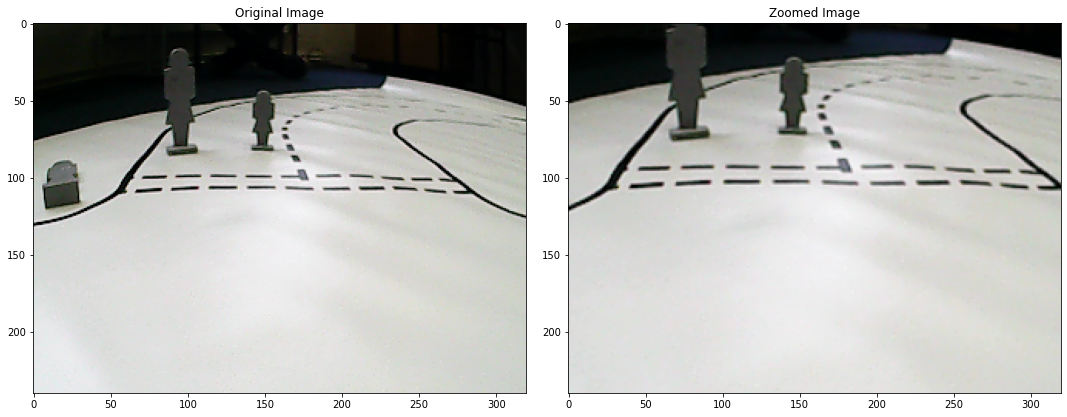

In [11]:
image = img_path[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

In [12]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image

Text(0.5, 1.0, 'Panned Image')

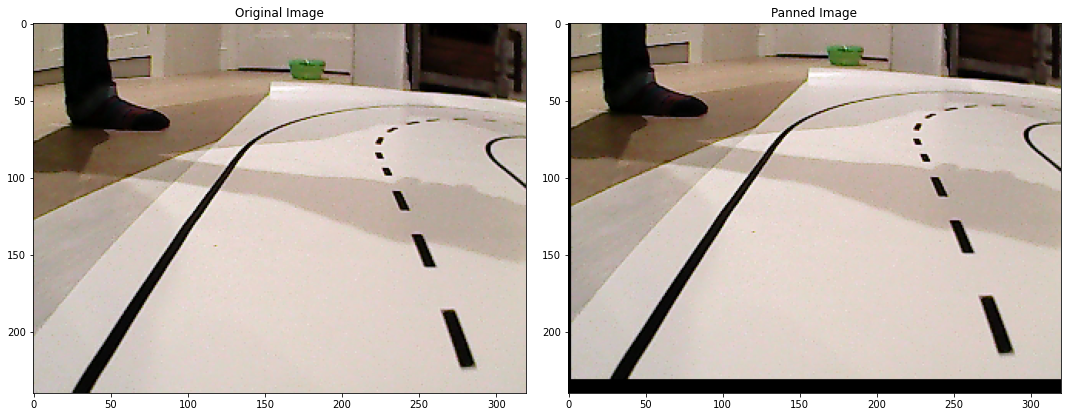

In [13]:
image = img_path[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')

In [14]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image

Text(0.5, 1.0, 'Brightness altered image ')

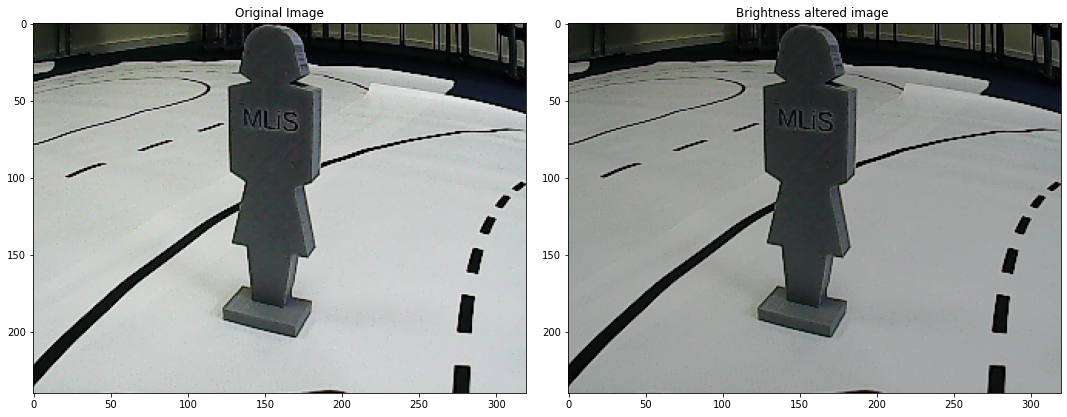

In [15]:
image = img_path[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

In [16]:
def img_random_flip(image, angle):
    image = cv2.flip(image,1)
    angle = 1-angle
    return image, angle

In [17]:
random_index = random.randint(0, 1000)
image = img_path1[random_index]
angle= angles[random_index]

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.4375')

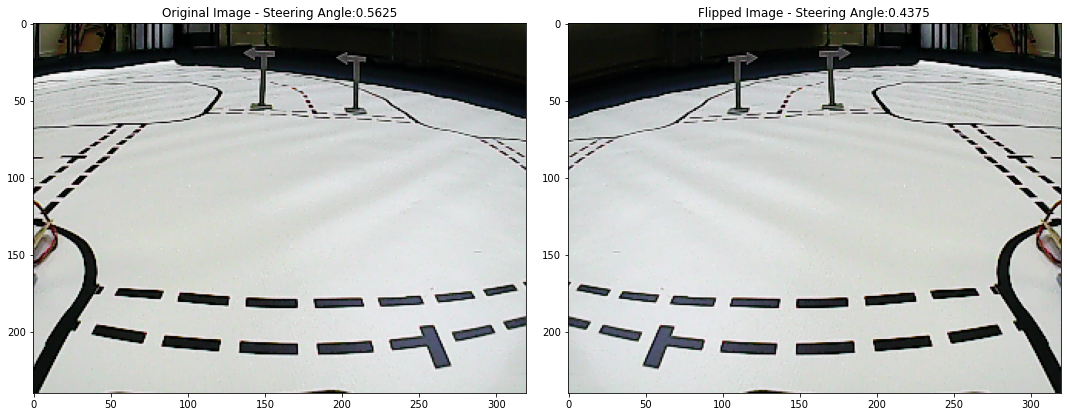

In [18]:

original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [19]:
def blur(image):
    kernel_size = random.randint(1, 5)  # kernel larger than 5 would make the image way too blurry
    image = cv2.blur(image,(kernel_size, kernel_size))
   
    return image

Text(0.5, 1.0, 'Blurred image ')

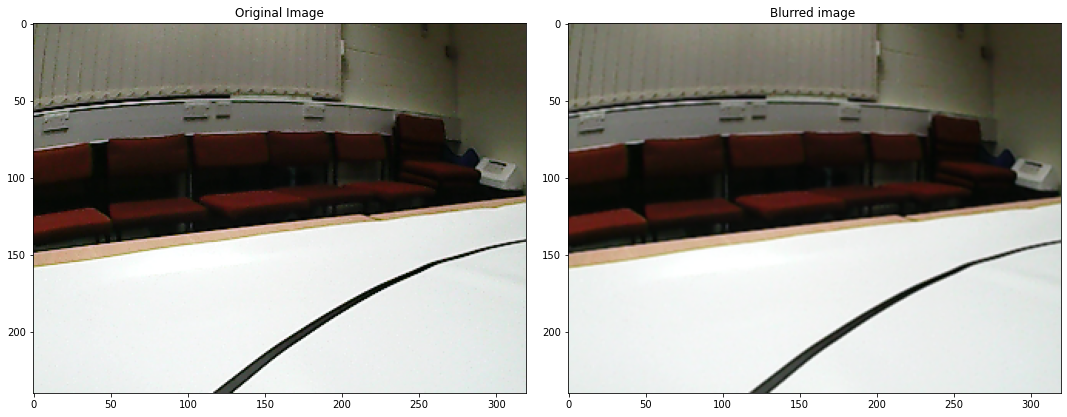

In [20]:
image = img_path[random.randint(0, 1000)]
original_image = mpimg.imread(image)
blurred_image = blur(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(blurred_image)
axs[1].set_title('Blurred image ')

In [21]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = blur(image)      
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


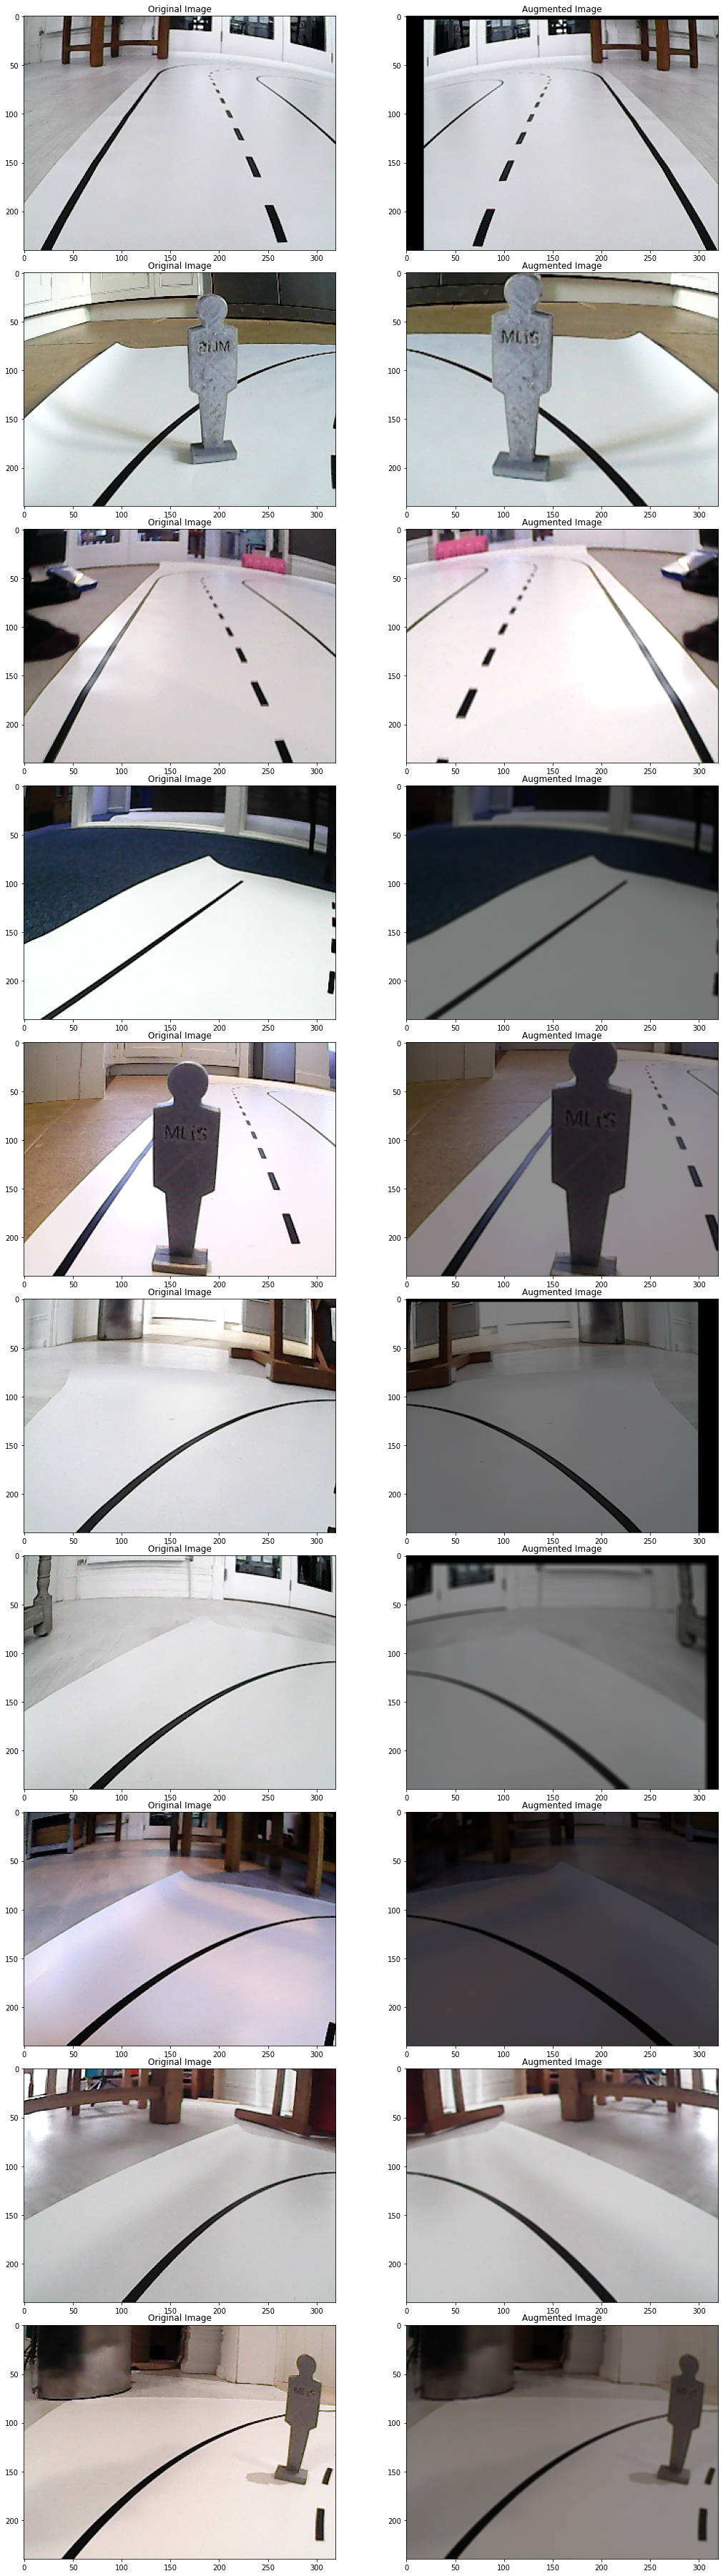

In [22]:
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(img_path) - 1)
  random_image = img_path[randnum]
  random_steering = angles[randnum]

  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

In [23]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[50:,50:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (224, 224))
    #img = img /255.0 
    #img = np.true_divide(image, 255, dtype=np.float32,casting="unsafe")
    return img

In [24]:
x_train_speed,x_valid_speed,y_train_speed,y_valid_speed= train_test_split(img_path,speeds1,test_size=0.2)
x_train_angle, x_valid_angle, y_train_angle, y_valid_angle = train_test_split(img_path1 , angles , test_size = 0.2)


Text(0.5, 1.0, 'Preprocessed Image')

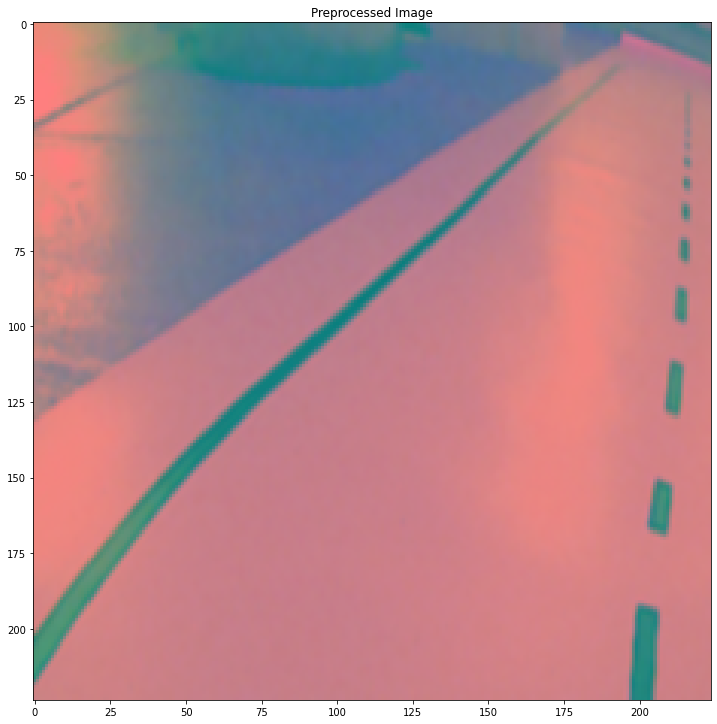

In [25]:
image = img_path[165]
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1, 1, figsize=(15, 10))
fig.tight_layout()

axs.imshow(preprocessed_image)
axs.set_title('Preprocessed Image')

In [27]:
x_train_speed

array(['cardata/training_data/training_data/4946.png',
       'cardata/training_data/training_data/9320.png',
       'cardata/training_data/training_data/7779.png', ...,
       'cardata/training_data/training_data/194.png',
       'cardata/training_data/training_data/8452.png',
       'cardata/training_data/training_data/7019.png'], dtype='<U45')

In [28]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image_path = image_paths[random_index]
            steering_angle = steering_angles[random_index]
            image = random_augment(image_paths[random_index], steering_angles[random_index])
            image = img_preprocess(image_path)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
            
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

In [29]:
x_train_gen, y_train_gen = next(image_data_generator(x_train_speed, y_train_speed, 1))
x_valid_gen, y_valid_gen = next(image_data_generator(x_valid_speed, y_valid_speed, 1))


Text(0.5, 1.0, 'Validation Image')

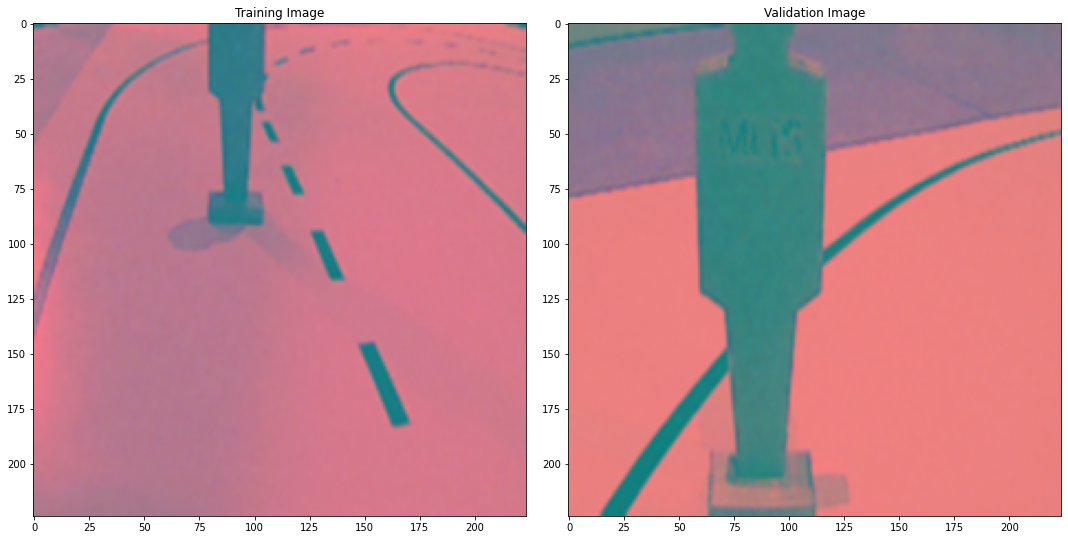

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [14]:
!pip install -U efficientnet


In [15]:
from tensorflow.keras import applications
help(applications)


Help on package tensorflow.keras.applications in tensorflow.keras:

NAME
    tensorflow.keras.applications - Keras Applications are canned architectures with pre-trained weights.

PACKAGE CONTENTS
    densenet (package)
    efficientnet (package)
    imagenet_utils (package)
    inception_resnet_v2 (package)
    inception_v3 (package)
    mobilenet (package)
    mobilenet_v2 (package)
    mobilenet_v3 (package)
    nasnet (package)
    resnet (package)
    resnet50 (package)
    resnet_v2 (package)
    vgg16 (package)
    vgg19 (package)
    xception (package)

FILE
    /usr/local/lib/python3.7/dist-packages/tensorflow/keras/applications/__init__.py




In [13]:
# !pip install tf-nightly

In [8]:
pip install -U keras-efficientnet-v2


In [46]:
from tensorflow.keras.applications.efficientnet import EfficientNetB3
Efficient_angle1= EfficientNetB3(input_shape = (224,224,3),weights='imagenet',include_top=False,classes=1000,classifier_activation="softmax")
Efficient_angle1.trainable = False

In [47]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
from tensorflow.keras.regularizers import l1,l2
for layer in Efficient_angle1.layers: 
    layer.trainable = True 
y = GlobalAveragePooling2D()(Efficient_angle1.output)
y = Dense(1024, activation ='elu')(y)
y = Dense(256, activation ='elu')(y)
y = Dense(64, activation ='elu')(y)
y = Dense(32, activation ='elu')(y)
angle_pred = Dense(1)(y)

In [51]:
from tensorflow.keras.models import Model
eff3_angle = Model(inputs = Efficient_angle1.input,outputs=angle_pred)
eff3_angle.summary()
eff3_angle.compile(optimizer = 'adam',loss="mse",metrics=["mse"])
eff3_angle.optimizer.learning_rate = 0.000001

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_6[0][0]']                
                                                                                                  
 normalization_1 (Normalization  (None, 224, 224, 3)  7          ['rescaling_6[0][0]']            
 )                                                                                                
                                                                                            

In [270]:
history_new2 = eff3_angle.fit_generator(image_data_generator(x_train_angle, y_train_angle, batch_size=50),
                              steps_per_epoch=500, epochs=10,
                              validation_data = image_data_generator(x_valid_angle,y_valid_angle, batch_size=50),
                              validation_steps=400,verbose=1, shuffle=1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
500/500 [==============================] - 783s 2s/step - loss: 0.0321 - mse: 0.0321 - val_loss: 0.0531 - val_mse: 0.0531
Epoch 2/10
500/500 [==============================] - 775s 2s/step - loss: 0.0145 - mse: 0.0145 - val_loss: 0.0151 - val_mse: 0.0151
Epoch 3/10
500/500 [==============================] - 777s 2s/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0116 - val_mse: 0.0116
Epoch 4/10
500/500 [==============================] - 775s 2s/step - loss: 0.0081 - mse: 0.0081 - val_loss: 0.0101 - val_mse: 0.0101
Epoch 5/10
500/500 [==============================] - 775s 2s/step - loss: 0.0072 - mse: 0.0072 - val_loss: 0.0095 - val_mse: 0.0095
Epoch 6/10
500/500 [==============================] - 778s 2s/step - loss: 0.0062 - mse: 0.0062 - val_loss: 0.0100 - val_mse: 0.0100
Epoch 7/10
500/500 [==============================] - 775s 2s/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0086 - val_mse: 0.0086
Epoch 8/10
500/500 [==============================] - 774s 2s/step - 

Text(0.5, 0, 'Epoch')

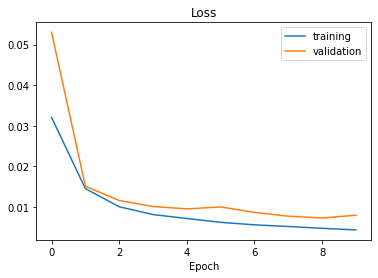

In [271]:
plt.plot(history_new2.history['loss'])
plt.plot(history_new2.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [ ]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
eff7_speed.save('modelforSpeed0505.h5')
from google.colab import files
files.download('modelforSpeed0505.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [273]:
# Mount my Google Drive.  It will ask for an authenticate code
### BEFORE THIS DONT FORGET TO UPLOAD MODEL FILE TO DRIVE
from google.colab import drive
drive.mount('/content/gdrive')
model_output_dir = '/content/gdrive/My Drive/Colab Notebooks'

Mounted at /content/gdrive


In [272]:
########## SAVING MODEL AND DOWNLOAD TO LOCAL #####
eff3_angle.save('modelforAngle0605.h5')
from google.colab import files
files.download('modelforAngle0605.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelSpeed = load_model(f'{model_output_dir}/modelforSpeed0505.h5')

In [276]:
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_squared_error, r2_score
modelAngle_n = load_model(f'{model_output_dir}/modelforAngle0605.h5')

In [277]:
import cv2
import matplotlib.image as mpimg
import numpy as np

In [278]:
##############FOR REAL TEST DATA################
###############################################
#################################################
import pandas as pd

datadir= 'cardata'
colums= ['image_id1','angle1','speed1']
data1=pd.read_csv(os.path.join(datadir,'Test.csv'))
data1.head()

image_id  angle  speed
0    1.png    NaN    NaN
1    2.png    NaN    NaN
2    3.png    NaN    NaN
3    4.png    NaN    NaN
4    5.png    NaN    NaN

In [279]:
print(data1.iloc[13])
def load_test_img(datadir, df):
  test_path = []
  
  for i in range(len(data1)):
    indexed_data = data1.iloc[i]
    image_id = indexed_data[0]
    test_path.append(os.path.join(datadir,image_id))
    test_paths = np.asarray(test_path)
 
  return test_paths

test_paths= load_test_img(datadir + '/test_data/test_data', data1)

image_id    14.png
angle          NaN
speed          NaN
Name: 13, dtype: object


In [280]:
def batch_generator_TEST(test_paths,NumberOfTestData):

  while True:
    batch_img = []
    
    for i in range(NumberOfTestData):
      im = mpimg.imread(test_paths[i])
      im = img_preprocess(im)
      batch_img.append(im)
          
    yield (np.asarray(batch_img))

In [281]:
test_paths

array(['cardata/test_data/test_data/1.png',
       'cardata/test_data/test_data/2.png',
       'cardata/test_data/test_data/3.png', ...,
       'cardata/test_data/test_data/1018.png',
       'cardata/test_data/test_data/1019.png',
       'cardata/test_data/test_data/1020.png'], dtype='<U36')

In [284]:
X_test_n=np.array(list(map(img_preprocess, test_paths)))


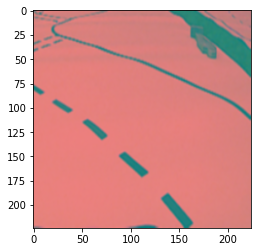

'cardata/test_data/test_data/3.png'

In [285]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(X_test_n[2])
plt.show()
test_paths[2]

In [ ]:
Speed_Pred = modelSpeed.predict(X_test)


In [ ]:
Speed_Pred

array([[0.0396],
       [0.9892],
       [0.7047],
       ...,
       [0.9638],
       [0.5123],
       [0.5574]], dtype=float32)

In [ ]:
Speed_Pred_r=np.around(Speed_Pred)

print(Speed_Pred_r)

[[0.0000]
 [1.0000]
 [1.0000]
 ...
 [1.0000]
 [1.0000]
 [1.0000]]


In [ ]:
pd.DataFrame(Speed_Pred_r).to_csv('Speed_Pred0505.csv')

In [286]:
Angle_Pred = modelAngle_n.predict(X_test_n)


In [287]:
Angle_Pred

array([[0.6245],
       [0.8056],
       [0.1934],
       ...,
       [0.3409],
       [0.4834],
       [0.2423]], dtype=float32)

In [288]:
pd.DataFrame(Angle_Pred).to_csv('Angle_Pred0605.csv')